# Fundamentals of Deep Learning Notes

pip install both tesnforflow and keras for everything to work!

##  The universal workflow of machine learning (7 steps)

1. Define the model and assemble the data
    * What will your input data be?
    * What type of problem are you facing? (e.g. binary classification, etc.)
    * **Hypotheses**  
        a. outputs can be predicted given inputs and   
        b. available data is sufficiently informative to learn the relationship beween inputs and outputs.
2. Choose a measure of success
    * Accuracy? Precision and recall? Customer-retention rate?
3. Decide on evaluation protocol
    * Simple hold-out validation
        - if little data is available, then your validation and test sets may contain too few samples to be statistically representative of the data at hand.
        - easy to recognize: if different random shuffling rounds of the data before splitting end up yielding very different measures of model performance.
    * K-fold cross-validation  
        - little data
    * Iterated K-fold validation with shuffling  
        - little data available and you need to evaluate your model as precisely as possible (use for Kaggle)
4. Prepare your data
    * Vectorisation - turn inputs and targets into tensors of floating-point data
    * Value normalisation. Data should have the following characteristics:
        - Take small values — Typically, most values should be in the 0–1 range.
        - Be homogenous — That is, all features should take values in roughly the same range  
    Otherwise can trigger large gradient updates that will prevent the network from converging.
    * Handling missing values
        - With neural networks, usually safe to set missing values as 0 (if 0 not meaningful)
        - Need to train with missing data if there is missing data in test set (artificially generate)
    * Feature engineering
    * **Extra considerations**
        - Data representativeness (usually should randomly shuffle data)
        - The arrow of time (do NOT randomly shuffle data)
        - Redundancy in your data - data poins appearing twice and ending up in both train and test datasets
5. Develop a model that does better than a baseline
    * Last-layer activation—This establishes useful constraints on the network’s output
    * Loss function—This should match the type of problem you’re trying to solve.
    * Optimization configuration— What optimizer will you use? What will its learning rate be? In most cases, it’s safe to go with rmsprop and its default learning rate.
6. Develop a model that overfits
    * Add layers
    * Make the layers bigger
    * Train for more epochs
7. Regularize the model (adjust for overfitting/underfitting) and tune hyperparameters
    * Add dropout
    * Try different architectures: add or remove layers
    * Add L1 and/or L2 regularization



| Problem type                           | Last-layer activation | Loss function             |
| :-:                                    | :-:                   | :-:                       |
|Binary classification                   | sigmoid               | binary_crossentropy       |
|Multiclass, single-label classification | softmax               | categorical_crossentropy  |
|Multiclass, multilabel classification   | sigmoid               | binary_crossentropy       |
|Regression to arbitrary values          | None                  |  mse                      |
|Regression to values between 0 and 1    | sigmoid               | mse or binary_crossentropy|

**BINARY CLASSIFICATION**  
**Input data:** vectors  
**Labels:** scalars (1s, 0s)  
**Amount of data:** Lots  
* 2x `Dense(16, activation='relu')`  
* 1x `Dense(1, activation='sigmoid')`  
* `optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy')`
* Validation phase: `epochs=20, batch_size=512, validation_data=(x_val, y_val)`
    * `x_val = x_train[:10000]`
    * `partial_x_train = x_train[10000:]`
    * `y_val = y_train[:10000]`
    * `partial_y_train = y_train[10000:]`

**MULTICLASS CLASSIFICATION**  
**Input data:** vectors  
**Labels:** vectors (1s, 0s) dim 46 (one-hot)  
**Amount of data:** Lots  
* 2x `Dense(64, activation='relu')` ($64>46$ avoids bottleneck)  
* 1x `Dense(46, activation='softmax')`  
* `optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy')`  
**OR** `loss='sparse_categorical_crossentropy` if cast labels as an integer tensor (instead of one-hot encoding)
* Validation phase: `epochs=20, batch_size=512, validation_data=(x_val, y_val)`
    * `x_val = x_train[:10000]`
    * `partial_x_train = x_train[10000:]`
    * `y_val = one_hot_train_labels[:1000]`
    * `partial_y_train = one_hot_train_labels[1000:]`

**SCALAR REGRESSION**  
**Input data:** vectors  
**Labels:** scalars ($\mathbb{R}$)  
**Amount of data:** Little ($\therefore$ K-fold)  
* 2x `Dense(64, activation='relu')`  
* 1x `Dense(1)`  
* `optimizer="rmsprop", loss="mse", metrics=["mae"])`
* Validation phase: `epochs=20, batch_size=512, validation_data=(x_val, y_val)`
    * `x_val = x_train[:10000]`
    * `partial_x_train = x_train[10000:]`
    * `y_val = one_hot_train_labels[:1000]`
    * `partial_y_train = one_hot_train_labels[1000:]`
- Remember to scale each feature
- K fold when little data

#### References
* binary cross-entropy:  
https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a  
Crossentropy is usually the best choice when you’re dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

* batch/minibatch  
https://stats.stackexchange.com/questions/117919/what-are-the-differences-between-epoch-batch-and-minibatch#:~:text=Batch%20means%20that%20you%20use,your%20data%20during%20one%20iteration.

#### Additional notes
* Adjusting to validation data will leak information about the validation data into the model.

# Examples

In [8]:
import matplotlib.pyplot as plt
import numpy as np

## MNIST

### Data

In [2]:
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape, train_labels)

print(train_images.shape, test_labels)

(60000, 28, 28) [5 0 4 ... 5 6 8]
(60000, 28, 28) [7 2 1 ... 4 5 6]


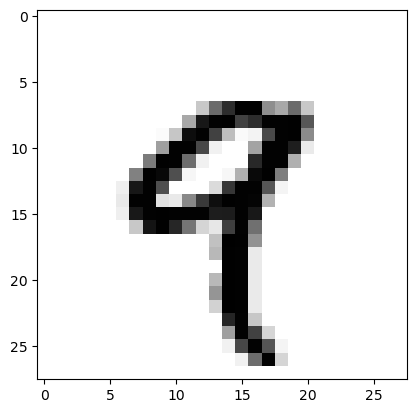

In [5]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Network architecture

In [6]:
from keras import layers, models

In [7]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation="softmax"))

### Compilation step

In [8]:
network.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

### Prepare image data

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

print(train_images.shape, train_labels)

print(train_images.shape, test_labels)

(60000, 784) [5 0 4 ... 5 6 8]
(60000, 784) [7 2 1 ... 4 5 6]


### Prepare labels data

In [10]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Train model

In [11]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2670 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1075 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0715 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0514 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0386 - accuracy: 0.9884


In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9760
test_acc: 0.9760000109672546


## Classifying movie reviews: binary classification

### Imports

In [1]:
from keras.datasets import imdb

### IMBD dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print("train and test labels shape: ", train_labels.shape, test_labels.shape)
print("Review 1 length: ", len(train_data[0]))
print("Review 2 length: ", len(train_data[1]))
print("Review 3 length: ", len(train_data[2]))
print("Max word: ", max([max(sequence) for sequence in train_data]))

train and test labels shape:  (25000,) (25000,)
Review 1 length:  218
Review 2 length:  189
Review 3 length:  141
Max word:  9999


In [4]:
def decode_review(index):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, "?") for i in train_data[index]]
    )
    return decoded_review

In [5]:
decode_review(0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

Turn lists of integers into tensors.

In [9]:
##  One-hot encode
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorise labels.  
(I don't think `np.asarray()` is required as both are already np arrays.)

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building the network

In [12]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [13]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

Alternative (configure optimizer & using custom losses and metrics):  
`from keras import losses`  
`from keras import metrics`  
`model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])`

### Validating the approach

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Train

In [15]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5464 - accuracy: 0.7695 - val_loss: 0.4189 - val_accuracy: 0.8585
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3437 - accuracy: 0.8873 - val_loss: 0.3265 - val_accuracy: 0.8799
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2552 - accuracy: 0.9148 - val_loss: 0.2876 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2065 - accuracy: 0.9305 - val_loss: 0.2759 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1720 - accuracy: 0.9414 - val_loss: 0.2884 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1434 - accuracy: 0.9547 - val_loss: 0.2894 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1257 - accuracy: 0.9598 - val_loss: 0.2906 - val_accuracy: 0.8841
Epoch 8/20
30

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
history_dict["loss"]

[0.5463536381721497,
 0.3436603546142578,
 0.25523751974105835,
 0.20653201639652252,
 0.1719857156276703,
 0.14343619346618652,
 0.125673308968544,
 0.10662688314914703,
 0.09144758433103561,
 0.07519407570362091,
 0.06844368577003479,
 0.0576784573495388,
 0.04564840346574783,
 0.03914799913764,
 0.033672627061605453,
 0.02804562821984291,
 0.02503507398068905,
 0.01988503336906433,
 0.015354342758655548,
 0.012859267182648182]

### Plot training and validation loss

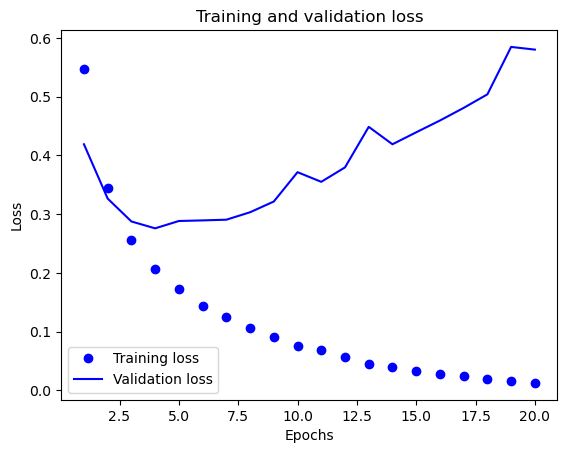

In [24]:
loss = history_dict["loss"]  # (train data) loss val for each epoch
val_loss = history_dict["val_loss"]  # (val data) loss val for each epoch

epochs = range(1, 21)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Plot training and validation accuracy

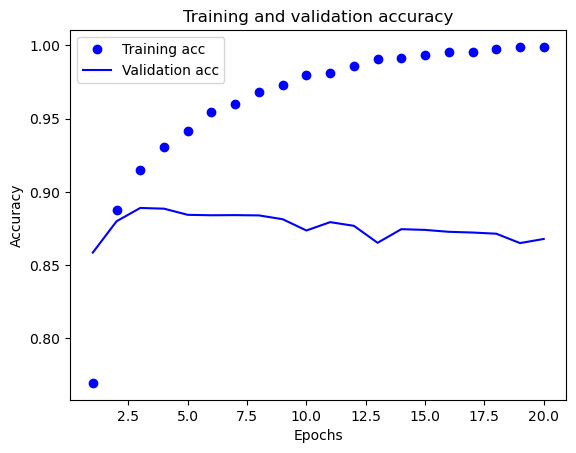

In [25]:
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Retraining the model using all training data

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4502 - accuracy: 0.8188
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2651 - accuracy: 0.9068
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2095 - accuracy: 0.9252
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2877 - accuracy: 0.8860


In [29]:
print("loss: ", results[0])
print("accuracy: ", results[1])

loss:  0.28769126534461975
accuracy:  0.8859599828720093


### Generating predictions on new data

In [30]:
predictions = model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


In [32]:
predictions

array([[0.22178088],
       [0.99985033],
       [0.8658708 ],
       ...,
       [0.11515076],
       [0.07169413],
       [0.6581077 ]], dtype=float32)

## Classifying newswires: a (single-label) multiclass classification example

### Imports

In [37]:
from keras.datasets import reuters

### Reuters dataset

In [38]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

In [39]:
print(len(train_data))
print(len(test_data))
print(train_data[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [40]:
def decode_newswire(index):
    word_index = reuters.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_newswire = " ".join(
        [reverse_word_index.get(i - 3, "?") for i in train_data[index]]
    )
    return decoded_newswire

In [41]:
decode_newswire(0)

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

In [79]:
len(train_data)

8982

In [80]:
len(train_labels)

8982

In [81]:
len(x_train)

25000

In [82]:
## One-hot encode
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [83]:
print(train_data[10])
print(x_train[10])

print(len(train_data[10]))
print(len(x_train[10]))

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
[0. 1. 0. ... 0. 0. 0.]
31
10000


In [84]:
## Categorical encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
print(len(one_hot_train_labels))

8982


In [85]:
print(train_labels[2])
print(one_hot_train_labels[2])
print(len(one_hot_train_labels[2]), end="\n\n")

print(len(train_labels))
print(len(one_hot_train_labels))

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
46

8982
8982


Equaivalent in built into Keras:  
`from keras.utils.np_utils import to_categorical`

`one_hot_train_labels = to_categorical(train_labels)`  
`one_hot_test_labels = to_categorical(test_labels)`

### Building the network

In [86]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [87]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

### Validating the approach

In [88]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [89]:
print(len(x_train))
print(len(one_hot_train_labels), end="\n\n")

print(len(partial_x_train))
print(len(partial_y_train))

8982
8982

7982
7982


### Train

In [90]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
16/16 [==============================] - 1s 37ms/step - loss: 2.7383 - accuracy: 0.4448 - val_loss: 1.8336 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.5469 - accuracy: 0.6750 - val_loss: 1.3738 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1759 - accuracy: 0.7456 - val_loss: 1.1833 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9599 - accuracy: 0.7905 - val_loss: 1.0828 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7976 - accuracy: 0.8271 - val_loss: 1.0014 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6651 - accuracy: 0.8495 - val_loss: 0.9429 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5610 - accuracy: 0.8782 - val_loss: 0.9187 - val_accuracy: 0.8090
Epoch 8/20
16

### Plot training and validation loss

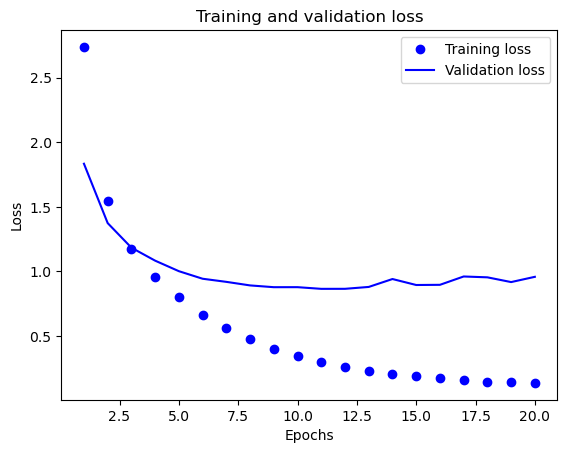

In [91]:
loss = history.history["loss"]  # (train data) loss val for each epoch
val_loss = history.history["val_loss"]  # (val data) loss val for each epoch

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plot training and validation accuracy

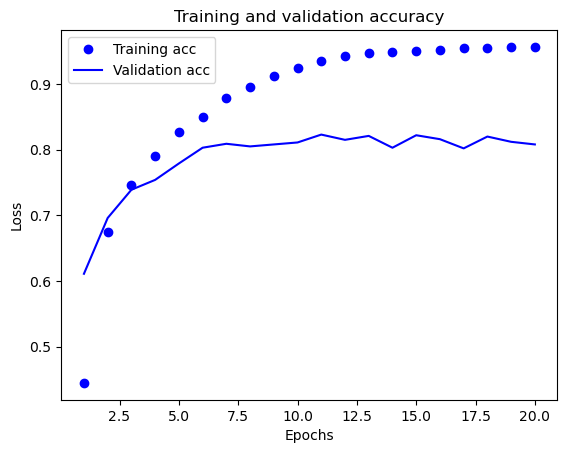

In [92]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Retraining the model using all training data

In [93]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val),
)

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 31ms/step - loss: 2.8674 - accuracy: 0.4662 - val_loss: 1.9162 - val_accuracy: 0.6200
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.5772 - accuracy: 0.6708 - val_loss: 1.3841 - val_accuracy: 0.6930
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1929 - accuracy: 0.7456 - val_loss: 1.1937 - val_accuracy: 0.7340
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.9686 - accuracy: 0.7963 - val_loss: 1.0838 - val_accuracy: 0.7610
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8075 - accuracy: 0.8301 - val_loss: 1.0016 - val_accuracy: 0.7850
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6754 - accuracy: 0.8607 - val_loss: 0.9400 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5618 - accuracy: 0.8842 - val_loss: 0.9196 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

In [94]:
print("loss: ", results[0])
print("accuracy: ", results[1])

loss:  0.9475755095481873
accuracy:  0.7796081900596619


### Generating predictions on new data

In [95]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [100]:
print(
    f"prediction vector length: {predictions[0].shape}",
    f"sum of predictions across categories: {np.sum(predictions[0])}",
    f"class with highest probability: {np.argmax(predictions[0])}",
    f"probability of class with highest probability: {predictions[0][np.argmax(predictions[0])]}",
    sep="\n",
)

prediction vector length: (46,)
sum of predictions across categories: 0.9999998807907104
class with highest probability: 3
probability of class with highest probability: 0.5920656323432922


## Predicting house prices: a regression example

### Imports

In [101]:
from keras.datasets import boston_housing

### Boston housing dataset

In [110]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [111]:
print(train_data.shape)
print(test_data.shape, end="\n\n")

print(train_data[10])
print(test_data[10])

(404, 13)
(102, 13)

[  9.59571   0.       18.1       0.        0.693     6.404   100.
   1.639    24.      666.       20.2     376.11     20.31   ]
[2.2876e-01 0.0000e+00 8.5600e+00 0.0000e+00 5.2000e-01 6.4050e+00
 8.5400e+01 2.7147e+00 5.0000e+00 3.8400e+02 2.0900e+01 7.0800e+01
 1.0630e+01]


### Preparing the data

In [112]:
## Normalising (mean = 0, std = 1)
# Use training data mean and std to normalise test data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

print(train_data[10])
print(test_data[10])

[ 0.63391647 -0.48361547  1.0283258  -0.25683275  1.15788777  0.19313958
  1.11048828 -1.03628262  1.67588577  1.5652875   0.78447637  0.22689422
  1.04466491]
[-0.380999   -0.48361547 -0.37402299 -0.25683275 -0.31887859  0.1945502
  0.58730449 -0.50578021 -0.51114231 -0.13178499  1.10299743 -3.02127105
 -0.29132553]


### Building the network

In [113]:
## Create function this time!


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating the approach (K-fold validation)

In [114]:
## 100 epochs and save the validation logs at each fold
k = 4
num_val_samples = len(train_data) // k

num_epochs = 100
all_scores = []


for i in range(k):
    print("processing fold #", i)

    # Prepares the validation data: data from partition #k
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

    # Prepares the training data: data from all other partition
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
         train_data[(i + 1) * num_val_samples :]],
        axis=0,
    )
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples],
         train_targets[(i + 1) * num_val_samples :]],
        axis=0,
    )

    # Builds the Keras model (already compiled)
    model = build_model()
    model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        batch_size=1,
        verbose=0,
    )

    # Evaluates the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [115]:
print(all_scores)
print("Mean: ", np.mean(all_scores))

[2.1502480506896973, 2.5449514389038086, 2.9080450534820557, 2.3532145023345947]
Mean:  2.489114761352539


In [116]:
## 500 epochs and save the validation logs at each epoch
k = 4
num_val_samples = len(train_data) // k

num_epochs = 500
all_mae_histories = []


for i in range(k):
    print("processing fold #", i)

    # Prepares the validation data: data from partition #k
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

    # Prepares the training data: data from all other partition
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
         train_data[(i + 1) * num_val_samples :]],
        axis=0,
    )
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples],
         train_targets[(i + 1) * num_val_samples :]],
        axis=0,
    )

    # Builds the Keras model (already compiled)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets), # evaluation now included in fit
                        epochs=num_epochs, batch_size=1, verbose=0)

    # Extract val_mean_absolute_error
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [120]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [125]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

print("length of mae history for fold 0:", len(all_mae_histories[0]))
print("length of average mae history:", len(average_mae_history))
print(average_mae_history[0])

length of mae history for fold 0: 500
length of average mae history: 500
4.350354075431824


### Plot validation loss (mae)

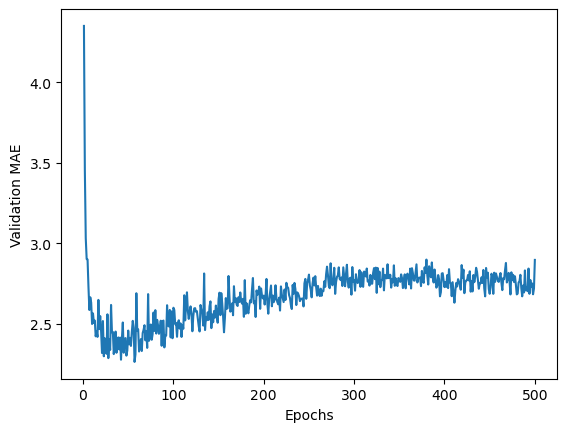

In [126]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a little difficult to see the plot, due to scaling issues and relatively high variance.  
We do the following:
* Omit the first 10 data points, which are on a different scale than the rest of the curve.
* Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

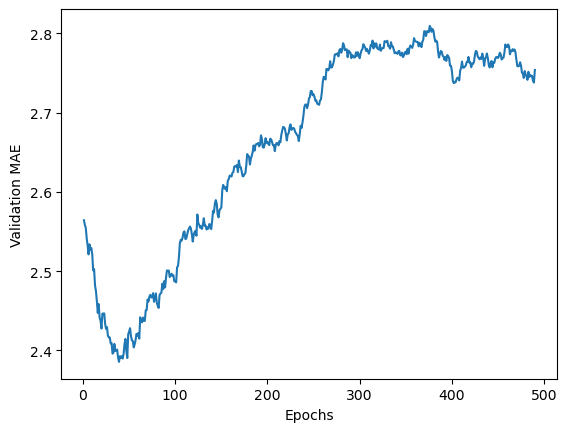

In [127]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Train final model

In [128]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=50, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 18.2071 - mae: 2.9429


In [129]:
test_mae_score

2.9429218769073486